  ### Marketing Analytics Project


Importing Libraries and Data Set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('ggplot')
plt.style.use({
    'axes.facecolor': '#EAEAF2',
    'axes.edgecolor': 'white',
    'axes.grid': True,
    'grid.color': 'white',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.color': '.8',
    'ytick.color': '.8',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False
})



1. Data Preprocessing

Generating Sample Customer Data

In [34]:
import pandas as pd
import numpy as np
import datetime as dt

# Simulating customer data
np.random.seed(42)
n_customers = 1000

customers = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'LastPurchaseDate': pd.to_datetime('2024-01-01') - pd.to_timedelta(np.random.randint(1, 365, size=n_customers), unit='D'),
    'TotalSpend': np.random.uniform(100, 5000, n_customers).round(2),
    'Frequency': np.random.randint(1, 50, n_customers)
})

# Calculate Recency (days since last purchase)
current_date = pd.to_datetime('2024-01-01')
customers['Recency'] = (current_date - customers['LastPurchaseDate']).dt.days

# Preview
print(customers.head())


   CustomerID LastPurchaseDate  TotalSpend  Frequency  Recency
0           1       2023-09-20     4950.81          6      103
1           2       2023-01-17     1679.53         32      349
2           3       2023-04-05     4068.38         29      271
3           4       2023-09-16     1347.74         43      107
4           5       2023-10-21     3439.36          2       72


Churn Predictions 

In [35]:
# Define churn threshold: Customers with Recency > 180 days are considered churned
customers['Churned'] = (customers['Recency'] > 180).astype(int)

# Simple Logistic Regression Model for Churn Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features and Target
X = customers[['Recency', 'Frequency', 'TotalSpend']]
y = customers['Churned']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       137

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Customer segmentations

/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

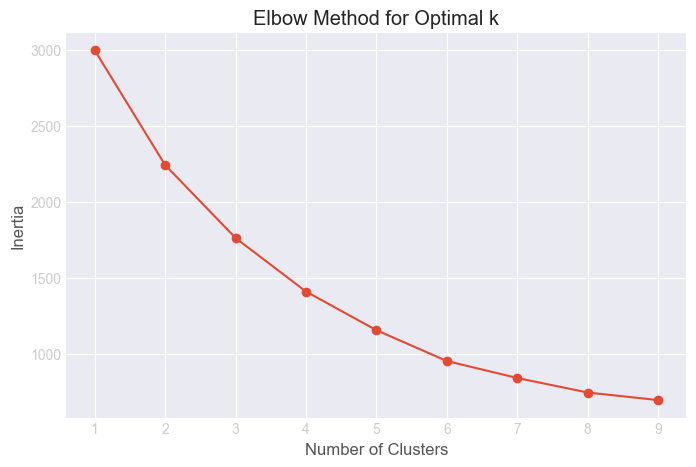

         CustomerID              LastPurchaseDate   TotalSpend  Frequency  \
Segment                                                                     
0        511.500000 2023-08-25 22:17:08.571428608  3999.976241  18.067669   
1        525.838565 2023-10-04 18:56:30.134529024  1514.663946  33.506726   
2        481.170732 2023-05-13 14:02:55.609756160  1574.748821  12.121951   
3        486.079245 2023-04-10 02:32:09.056603648  2972.986981  37.649057   

            Recency   Churned  
Segment                        
0        128.071429  0.263158  
1         88.210762  0.071749  
2        232.414634  0.731707  
3        265.894340  0.879245  


/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scaling data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers[['Recency', 'Frequency', 'TotalSpend']])

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Applying K-Means with optimal k (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customers['Segment'] = kmeans.fit_predict(X_scaled)

# Preview segmented data
print(customers.groupby('Segment').mean())


In [3]:
# Load dataset with error handling
try:
    nike_data = pd.read_csv('/Users/pratyushsingh/Downloads/Nike Dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("There was an error parsing the CSV file. It might be corrupted or in an unexpected format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
else:
    # If the file is successfully read, proceed with the rest of your code
    # Convert Invoice Date to datetime with the correct format
    nike_data['Invoice Date'] = pd.to_datetime(nike_data['Invoice Date'], format='%d-%m-%Y')

    # Check for missing values
    missing_values = nike_data.isnull().sum()
    print("Missing Values:\n", missing_values)

Missing Values:
 Invoice Date      0
Product           0
Region            0
Retailer          0
Sales Method      0
State             0
Price per Unit    0
Total Sales       0
Units Sold        0
dtype: int64


In [4]:
nike_data['Invoice Date'] = pd.to_datetime(nike_data['Invoice Date'], dayfirst=True)

In [5]:
print(nike_data['Invoice Date'].head())

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: Invoice Date, dtype: datetime64[ns]


In [6]:
nike_data.head()

Invoice Date                    Product     Region     Retailer  \
0   2020-01-01      Men's Street Footwear  Northeast  Foot Locker   
1   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-03    Women's Street Footwear  Northeast  Foot Locker   
3   2020-01-04  Women's Athletic Footwear  Northeast  Foot Locker   
4   2020-01-05              Men's Apparel  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              50         6000         120  
1     In-store  New York              50         5000         100  
2     In-store  New York              40         4000         100  
3     In-store  New York              45         3825          85  
4     In-store  New York              60         5400          90

In [7]:
nike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice Date    9360 non-null   datetime64[ns]
 1   Product         9360 non-null   object        
 2   Region          9360 non-null   object        
 3   Retailer        9360 non-null   object        
 4   Sales Method    9360 non-null   object        
 5   State           9360 non-null   object        
 6   Price per Unit  9360 non-null   int64         
 7   Total Sales     9360 non-null   int64         
 8   Units Sold      9360 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 658.3+ KB


2. Exploratory Data Analysis (EDA)

Time-based Analysis

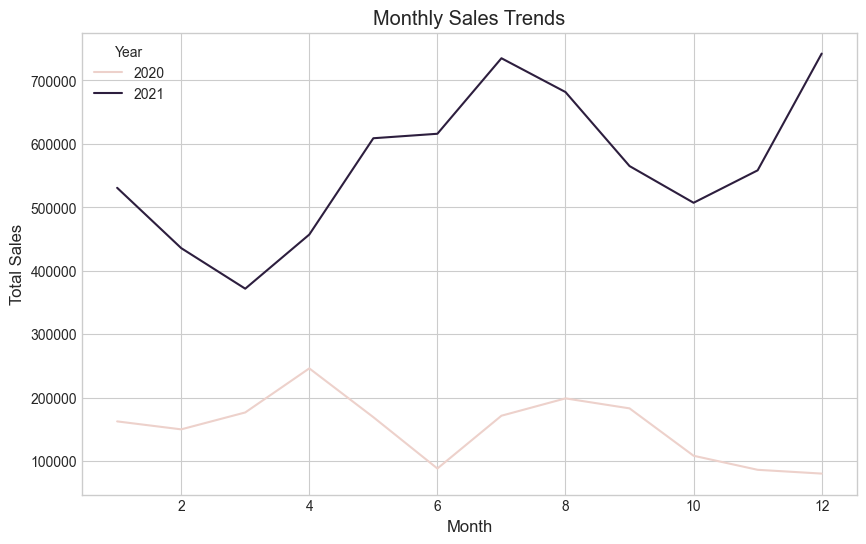

In [5]:
# Extract month and year for time series analysis
nike_data['Month'] = nike_data['Invoice Date'].dt.month
nike_data['Year'] = nike_data['Invoice Date'].dt.year

# Plot monthly sales trends
monthly_sales = nike_data.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Use one of the solutions mentioned above, for example:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', hue='Year')
plt.title('Monthly Sales Trends')
plt.show()

Product Analysis

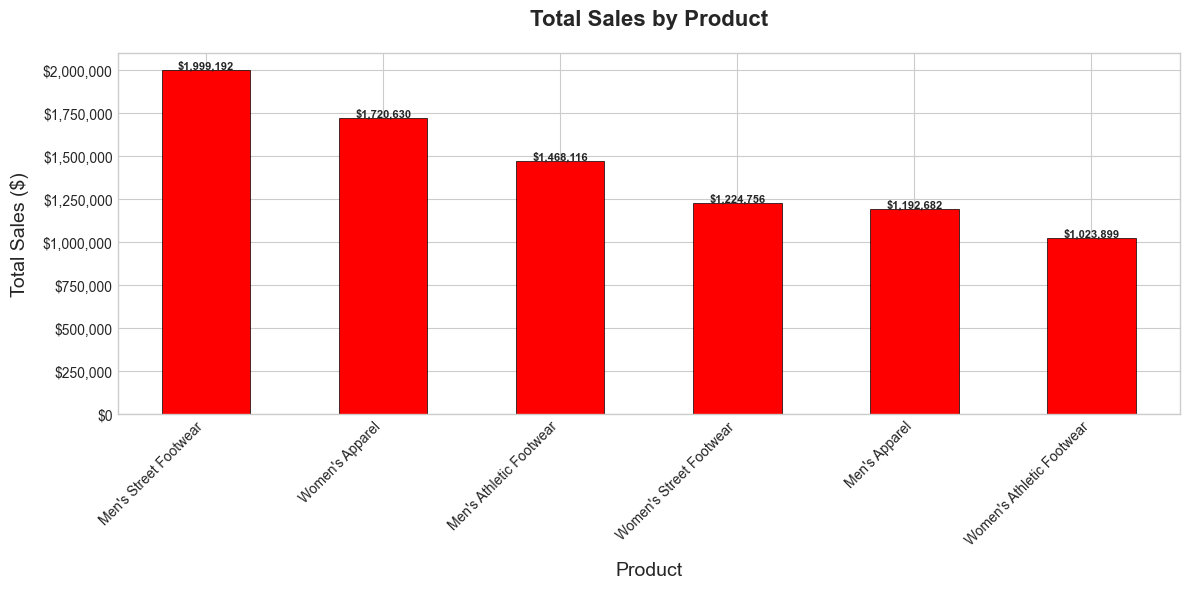

In [6]:
# Product sales distribution
product_sales = nike_data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 6))
bars = product_sales.plot(kind='bar', color='red', edgecolor='black')
plt.title('Total Sales by Product', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Total Sales ($)', fontsize=14, labelpad=10)
plt.xlabel('Product', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis labels as currency
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add value labels on top of each bar
for i, v in enumerate(product_sales):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Geographic Analysis

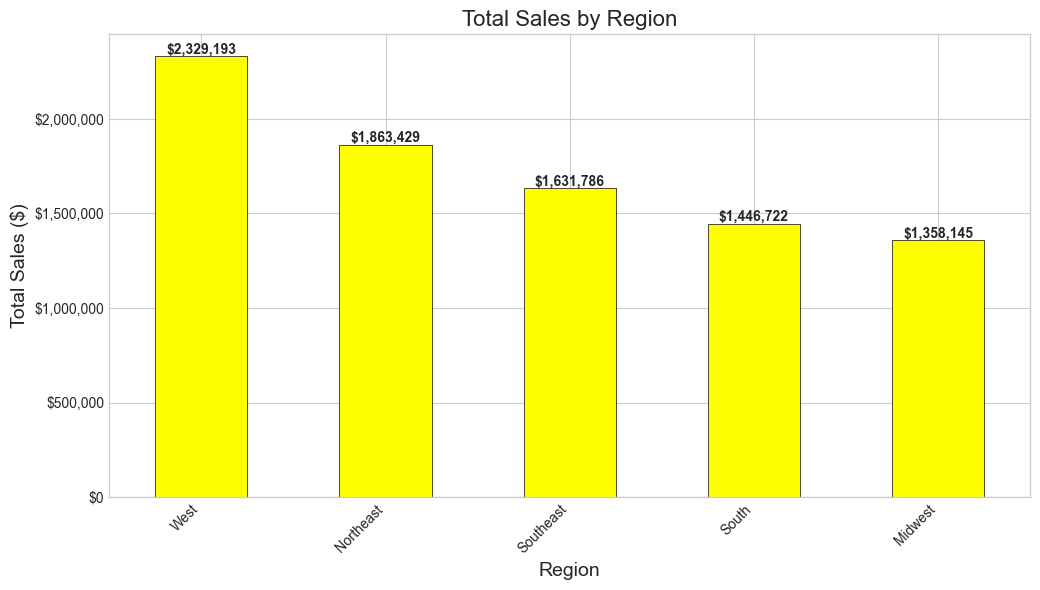

In [7]:
# Sales by Region and State
region_sales = nike_data.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(10, 6))
bars = region_sales.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Total Sales by Region', fontsize=16)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(region_sales):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Customize y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.show()

3. Revenue and Profit Analysis

In [8]:
# Total revenue calculation
total_revenue = nike_data['Total Sales'].sum()
print("Total Revenue: $", total_revenue)

# Average revenue per product
average_sales = nike_data.groupby('Product')['Total Sales'].mean()
print("Average Sales per Product:\n", average_sales)


Total Revenue: $ 8629275
Average Sales per Product:
 Product
Men's Apparel                 764.539744
Men's Athletic Footwear       941.100000
Men's Street Footwear        1281.533333
Women's Apparel              1102.967949
Women's Athletic Footwear     656.345513
Women's Street Footwear       785.100000
Name: Total Sales, dtype: float64


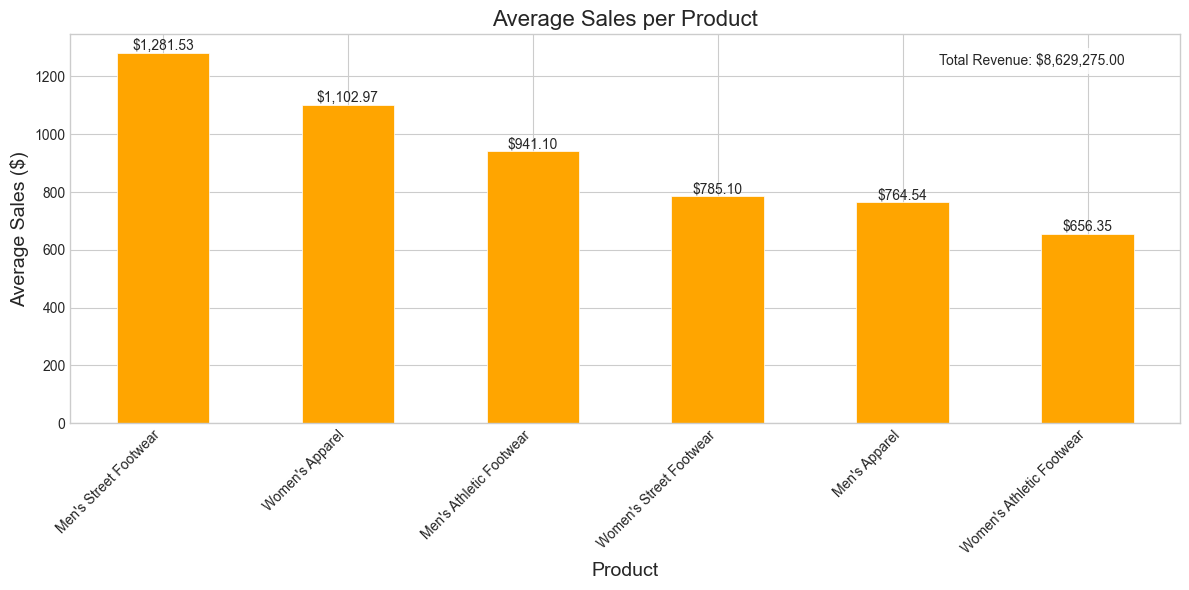

In [9]:
# Total revenue calculation
total_revenue = nike_data['Total Sales'].sum()

# Average revenue per product
average_sales = nike_data.groupby('Product')['Total Sales'].mean().sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 6))
average_sales.plot(kind='bar', color='orange')  # Set bar color to orange
plt.title('Average Sales per Product', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Average Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total revenue as text
plt.text(0.95, 0.95, f'Total Revenue: ${total_revenue:,.2f}', 
         transform=plt.gca().transAxes, ha='right', va='top', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Add value labels on top of each bar
for i, v in enumerate(average_sales):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')

plt.show()

4. Customer Insights

In [10]:
# Average Order Value and Units Sold
average_order_value = nike_data['Total Sales'].mean()
average_units_sold = nike_data['Units Sold'].mean()
print("Average Order Value: $", average_order_value)
print("Average Units Sold:", average_units_sold)


Average Order Value: $ 921.9310897435897
Average Units Sold: 25.852991452991454


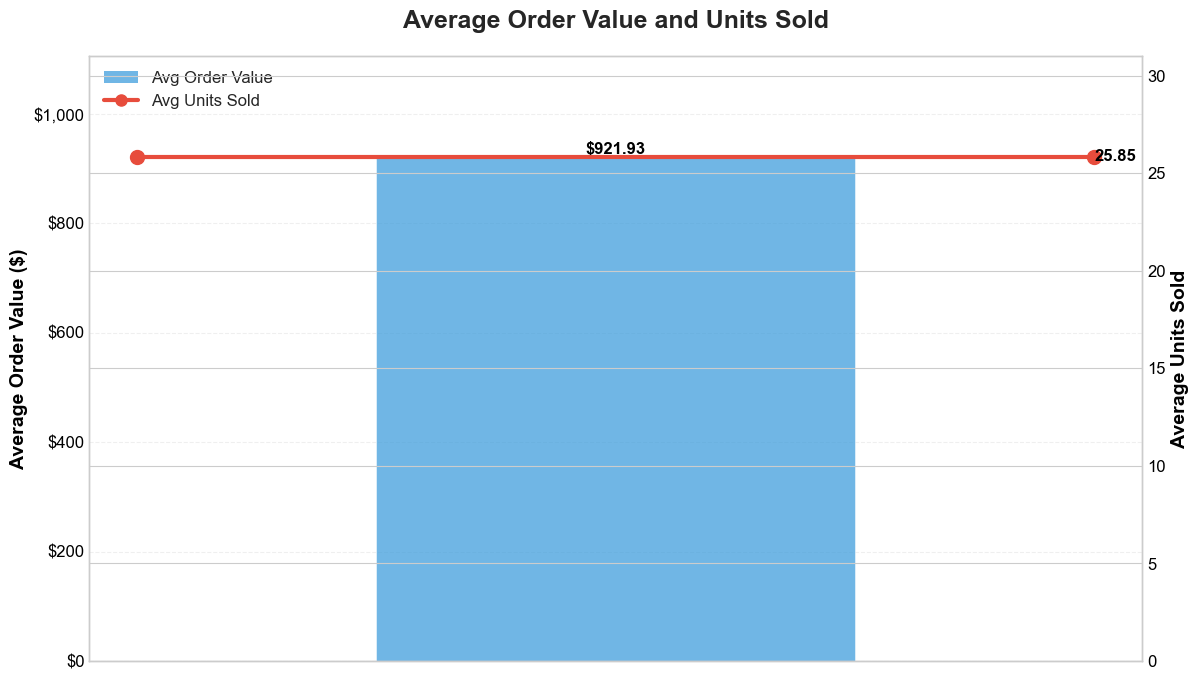

In [11]:
# Calculate Average Order Value and Units Sold
average_order_value = nike_data['Total Sales'].mean()
average_units_sold = nike_data['Units Sold'].mean()

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 7))

# Color scheme
bar_color = '#3498db'  # Blue
line_color = '#e74c3c'  # Red

# Bar chart for Average Order Value
bar = ax1.bar('Average Order Value', average_order_value, color=bar_color, alpha=0.7, width=0.5)
ax1.set_ylabel('Average Order Value ($)', color='black', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add value label on the bar
ax1.text(0, average_order_value, f'${average_order_value:,.2f}', 
         ha='center', va='bottom', fontweight='bold', color='black', fontsize=12)

# Create a second y-axis for Average Units Sold
ax2 = ax1.twinx()

# Line plot for Average Units Sold
line = ax2.plot([-0.5, 0.5], [average_units_sold, average_units_sold], color=line_color, linewidth=3, marker='o', markersize=10)
ax2.set_ylabel('Average Units Sold', color='black', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add value label for the line
ax2.text(0.5, average_units_sold, f'{average_units_sold:,.2f}', 
         ha='left', va='center', fontweight='bold', color='black', fontsize=12)

# Set the title and adjust layout
plt.title('Average Order Value and Units Sold', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

# Remove x-axis labels
ax1.set_xticks([])

# Add a legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=bar_color, edgecolor='none', alpha=0.7, label='Avg Order Value'),
                   plt.Line2D([0], [0], color=line_color, lw=3, label='Avg Units Sold', marker='o', markersize=8)]
ax1.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize=12)

# Add a subtle grid
ax1.grid(True, linestyle='--', alpha=0.3)

# Set y-axis limits for better proportion
ax1.set_ylim(0, average_order_value * 1.2)
ax2.set_ylim(0, average_units_sold * 1.2)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.show()


5. Visualization

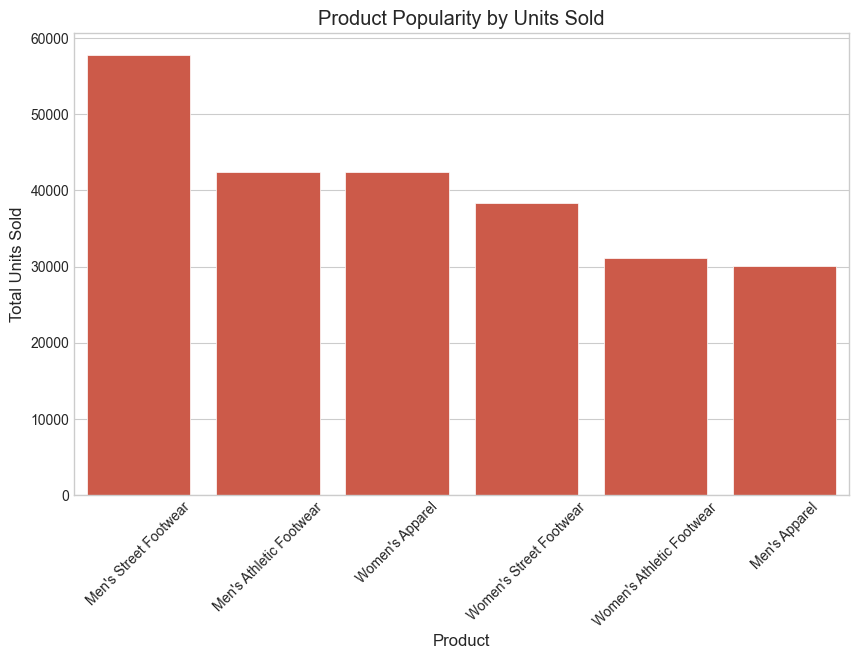

In [12]:
# Aggregate units sold per product
product_units = nike_data.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

# Plot total units sold per product
plt.figure(figsize=(10, 6))
sns.barplot(x=product_units.index, y=product_units.values)
plt.title('Product Popularity by Units Sold')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


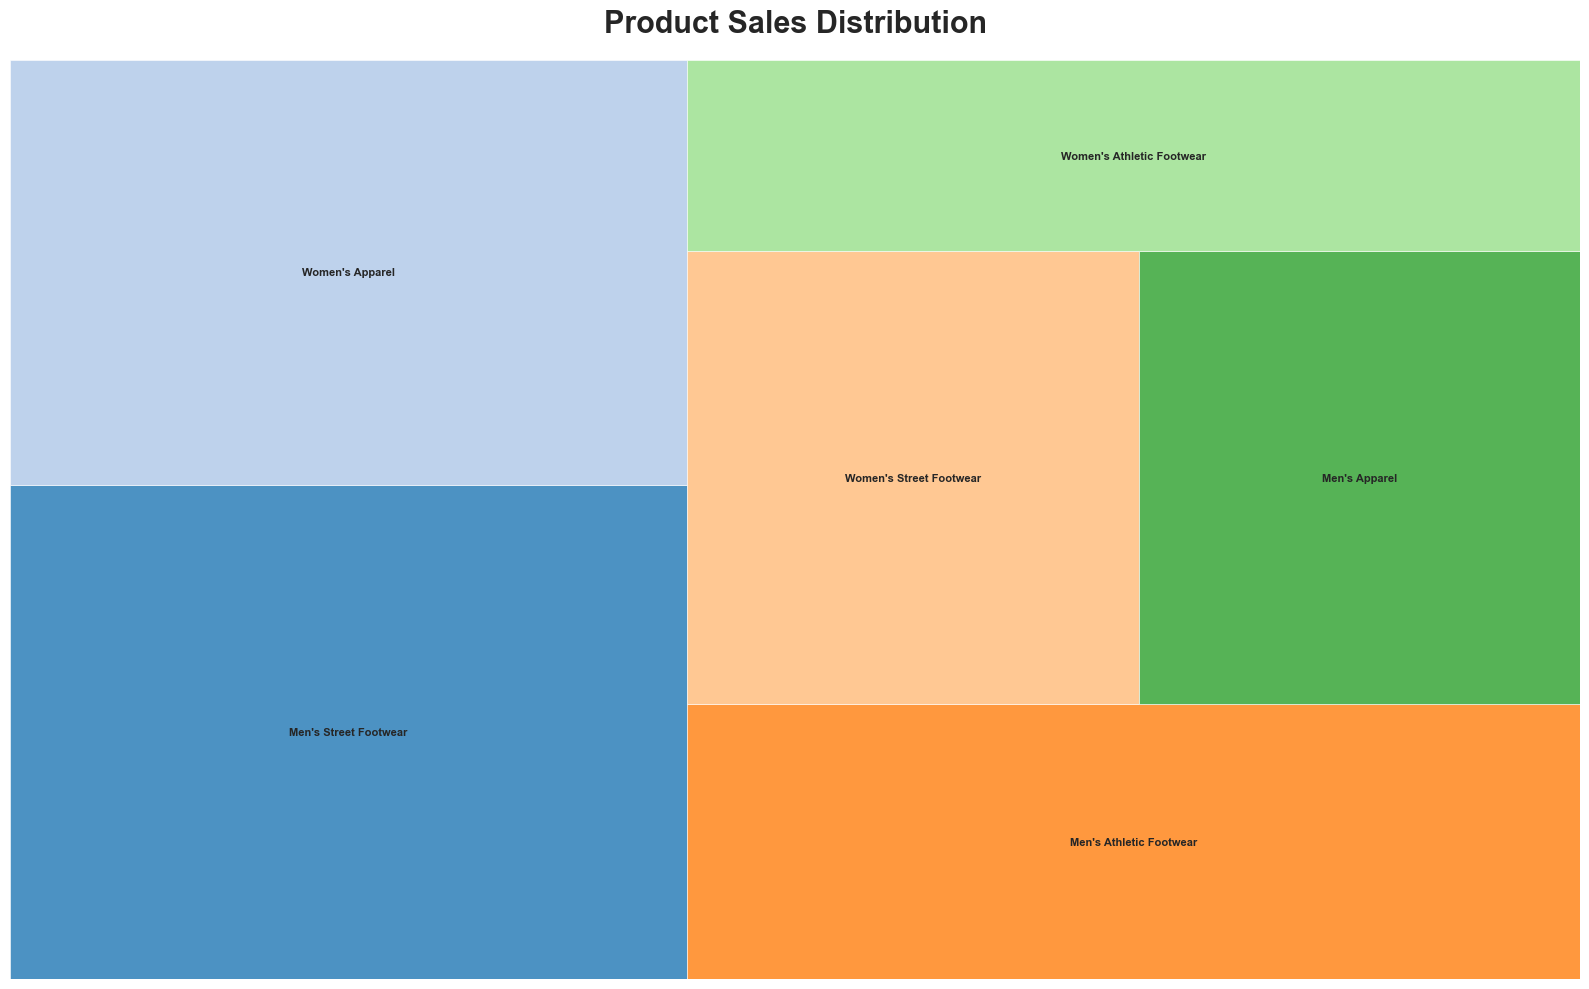

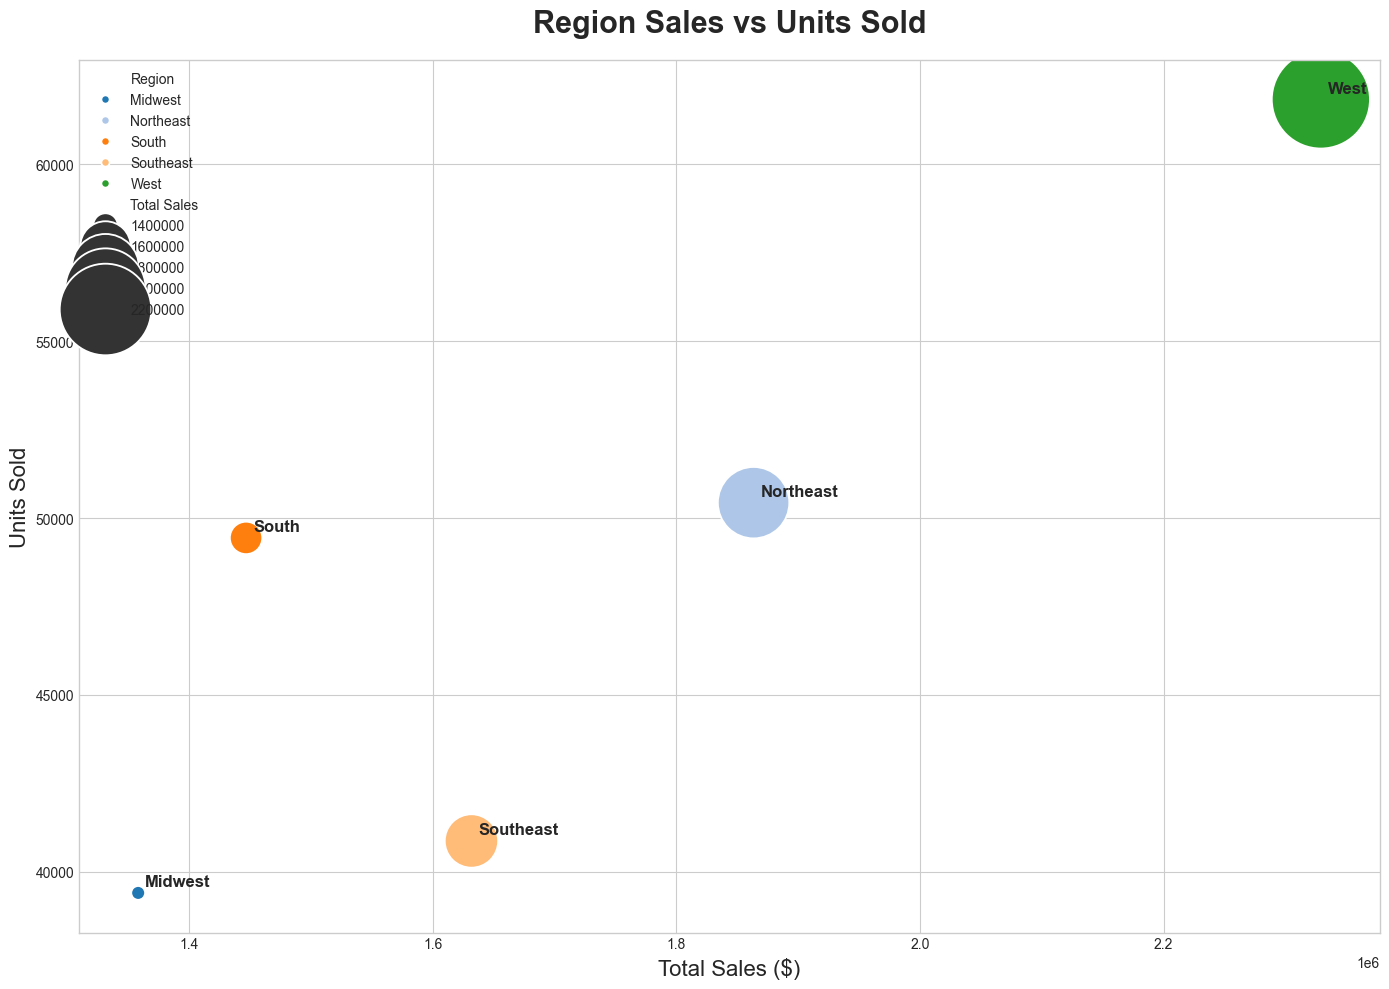

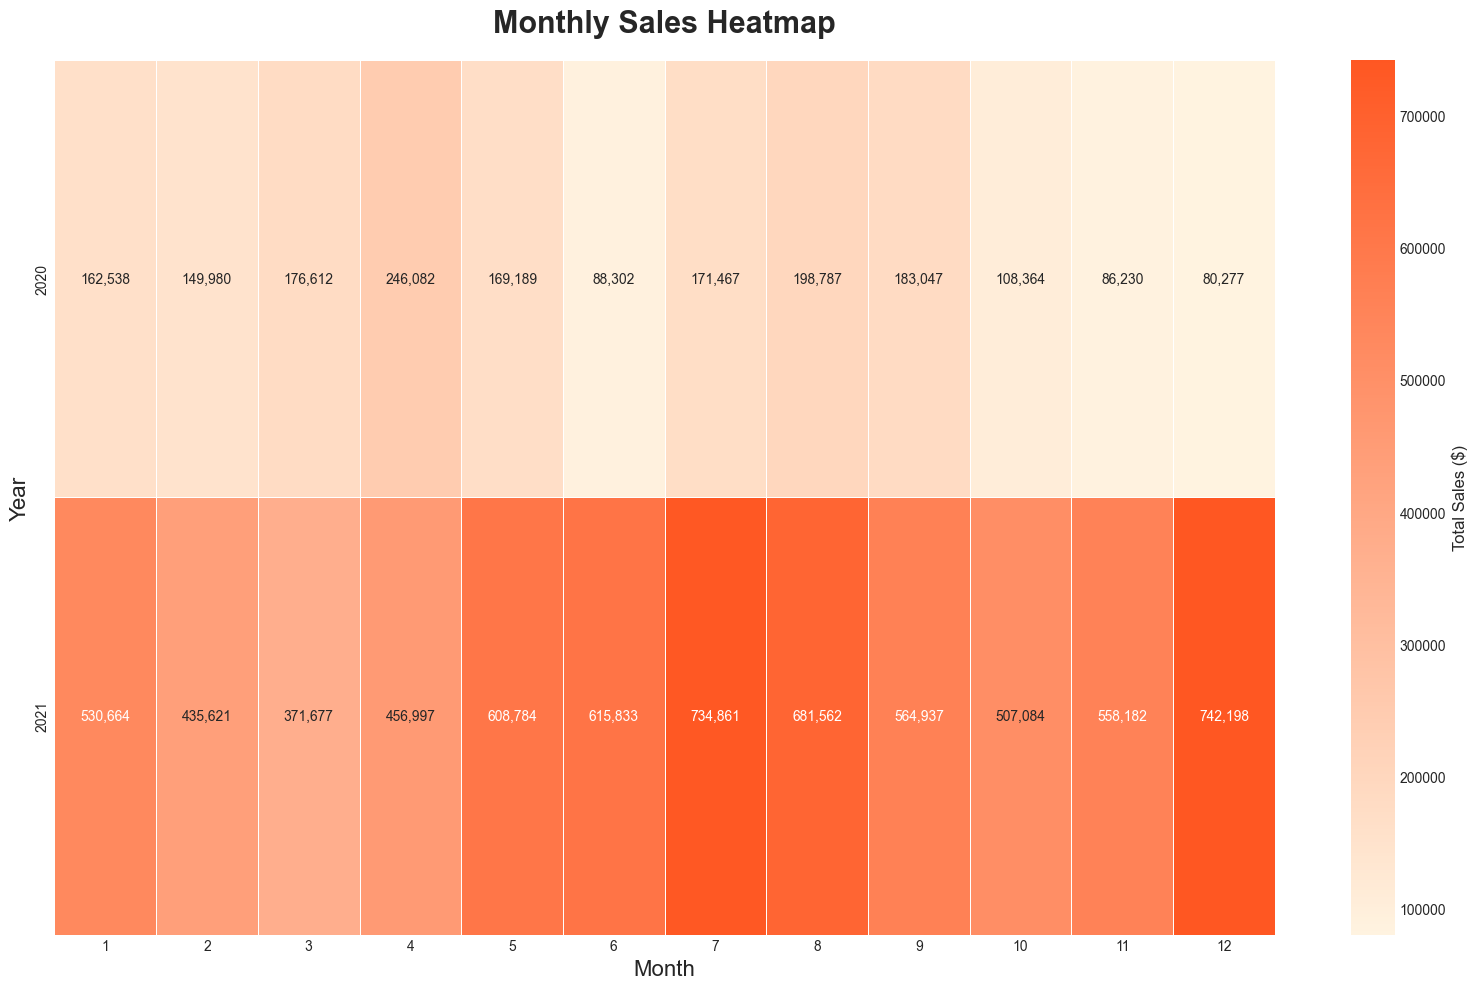

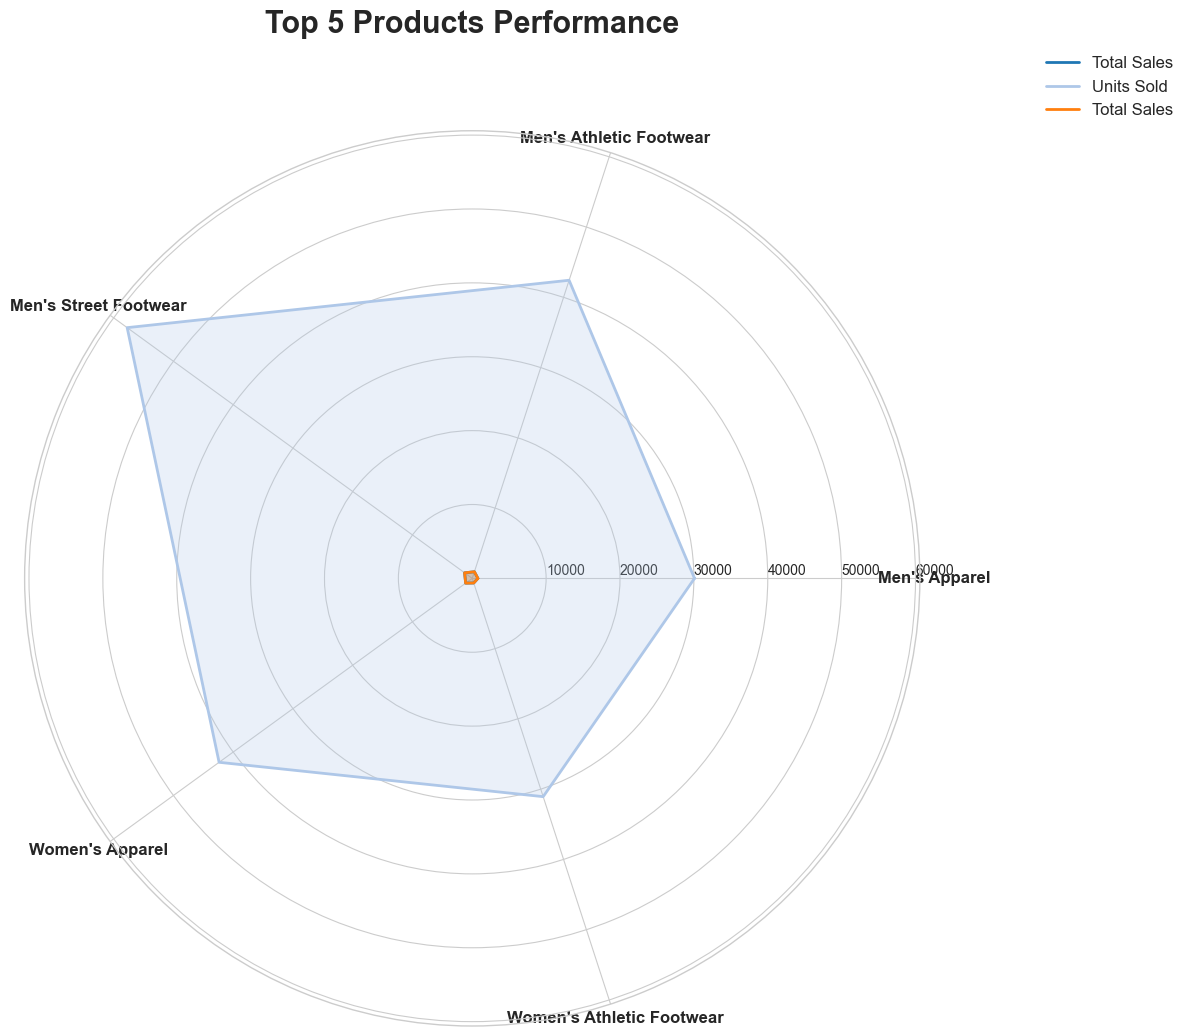

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap

# Load the data
nike_data = pd.read_csv('/Users/pratyushsingh/Downloads/Nike Dataset.csv')

# Convert Invoice Date to datetime
nike_data['Invoice Date'] = pd.to_datetime(nike_data['Invoice Date'], dayfirst=True)

# Set a consistent color palette
colors = plt.cm.tab20.colors  # Using matplotlib's tab20 color palette

# Visualization Functions
def create_treemap(nike_data):
    """Create Treemap for Product Sales Distribution"""
    plt.figure(figsize=(16, 10))
    product_sales = nike_data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
    
    squarify.plot(sizes=product_sales.values, 
                  label=product_sales.index, 
                  alpha=0.8, 
                  color=colors[:len(product_sales)],
                  text_kwargs={'fontsize':8, 'fontweight':'bold'})
    plt.title('Product Sales Distribution', fontsize=22, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def create_bubble_chart(nike_data):
    """Create Bubble Chart for Region Sales and Units Sold"""
    region_data = nike_data.groupby('Region').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()
    
    plt.figure(figsize=(14, 10))
    sns.scatterplot(data=region_data, x='Total Sales', y='Units Sold', 
                    size='Total Sales', hue='Region', 
                    sizes=(100, 5000), palette=colors[:len(region_data)], legend='brief')
    
    plt.title('Region Sales vs Units Sold', fontsize=22, fontweight='bold', pad=20)
    plt.xlabel('Total Sales ($)', fontsize=16)
    plt.ylabel('Units Sold', fontsize=16)
    
    for i, row in region_data.iterrows():
        plt.annotate(row['Region'], (row['Total Sales'], row['Units Sold']), 
                     xytext=(5,5), textcoords='offset points', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_monthly_sales_heatmap(nike_data):
    """Create Heatmap for Monthly Sales Trends"""
    nike_data['Month'] = nike_data['Invoice Date'].dt.month
    nike_data['Year'] = nike_data['Invoice Date'].dt.year
    monthly_sales = nike_data.groupby(['Year', 'Month'])['Total Sales'].sum().unstack()
    
    plt.figure(figsize=(16, 10))
    custom_cmap = LinearSegmentedColormap.from_list("", ["#FFF3E0", "#FF5722"])
    
    sns.heatmap(monthly_sales, annot=True, fmt=',.0f', cmap=custom_cmap, 
                linewidths=0.5, cbar_kws={'label': 'Total Sales ($)'})
    
    plt.title('Monthly Sales Heatmap', fontsize=22, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Year', fontsize=16)
    plt.tight_layout()
    plt.show()

def create_radar_chart(nike_data):
    """Create Radar Chart for Product Performance"""
    product_metrics = nike_data.groupby('Product').agg({
        'Total Sales': 'sum',
        'Units Sold': 'sum',
        'Total Sales': lambda x: x.mean()  # Average order value
    }).head(5)  # Top 5 products
    
    categories = list(product_metrics.index)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    for i, metric in enumerate(['Total Sales', 'Units Sold', 'Total Sales']):
        values = product_metrics[metric].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=metric, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    plt.xticks(angles[:-1], categories, fontsize=12, fontweight='bold')
    ax.set_rlabel_position(0)
    plt.yticks(fontsize=10)
    plt.title("Top 5 Products Performance", size=22, fontweight='bold', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    plt.tight_layout()
    plt.show()

def create_sunburst_chart(nike_data):
    """Create Sunburst Chart for Sales Hierarchy"""
    hierarchical_data = nike_data.groupby(['Region', 'State', 'Product'])['Total Sales'].sum().reset_index()
    
    fig = px.sunburst(hierarchical_data, path=['Region', 'State', 'Product'], values='Total Sales',
                      color='Total Sales', color_continuous_scale='Viridis',
                      title='Sales Hierarchy: Region > State > Product')
    fig.update_layout(title_font_size=22, title_font_color='#333')
    fig.show()

def create_time_series_bubble_chart(nike_data):
    """Create Animated Bubble Chart for Time Series Data"""
    time_series_data = nike_data.groupby(['Invoice Date', 'Product']).agg({
        'Total Sales': 'sum',
        'Units Sold': 'sum'
    }).reset_index()
    
    fig = px.scatter(time_series_data, x="Total Sales", y="Units Sold", 
                     animation_frame="Invoice Date",
                     animation_group="Product", 
                     size="Total Sales", 
                     color="Product", 
                     hover_name="Product",
                     log_x=True, 
                     size_max=60, 
                     range_x=[10,100000], 
                     range_y=[0,5000],
                     color_discrete_sequence=px.colors.qualitative.Bold)
    
    fig.update_layout(
        title='Product Performance Over Time',
        title_font_size=22,
        title_font_color='#333',
        xaxis_title='Total Sales (log scale)',
        yaxis_title='Units Sold',
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        legend_title_font_size=12
    )
    fig.show()

# Execute all visualizations
def main():
    create_treemap(nike_data)
    create_bubble_chart(nike_data)
    create_monthly_sales_heatmap(nike_data)
    create_radar_chart(nike_data)
    create_sunburst_chart(nike_data)
    create_time_series_bubble_chart(nike_data)

# Run the visualizations
if __name__ == "__main__":
    main()

Additonal Analysis OF Data

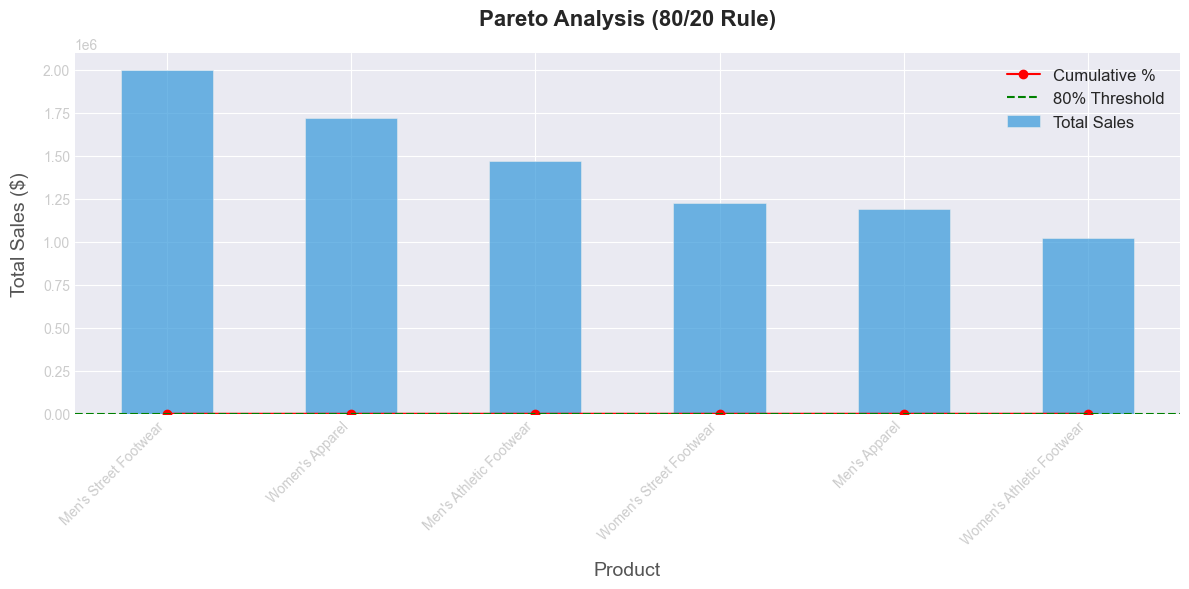

In [8]:
# Pareto Analysis (80/20 Rule)
pareto_data = nike_data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
cumulative_sales = pareto_data.cumsum()
total_sales = pareto_data.sum()

# Calculate cumulative percentage
cumulative_percentage = cumulative_sales / total_sales * 100

plt.figure(figsize=(12, 6))
pareto_data.plot(kind='bar', color='#3498db', alpha=0.7, label='Total Sales')
plt.plot(cumulative_percentage, color='red', marker='o', label='Cumulative %')

plt.title('Pareto Analysis (80/20 Rule)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Total Sales ($)', fontsize=14, labelpad=10)
plt.xlabel('Product', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add a reference line for 80%
plt.axhline(y=80, color='green', linestyle='--', linewidth=1.5, label='80% Threshold')

# Add legend and labels
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


 Choropleth Map

In [15]:
import plotly.express as px

# Ensure 'State' column has two-letter abbreviations and group by state
geo_data = nike_data.groupby('State', as_index=False)['Total Sales'].sum()

# Choropleth Map
fig = px.choropleth(
    geo_data,
    locations='State',  # Ensure this matches your state column
    locationmode='USA-states',  # For US states
    color='Total Sales',
    color_continuous_scale='Blues',
    title='Total Sales by State',
    hover_name='State',  # Display state name on hover
    hover_data={'Total Sales': True, 'State': False}  # Highlight sales value only
)

# Add layout updates for better visualization
fig.update_layout(
    geo=dict(
        scope='usa',
        showlakes=True,  # Highlight lakes
        lakecolor='lightblue'
    ),
    title_font=dict(size=22),
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Total Sales",
        ticksuffix=" $",  # Add a currency suffix if needed
    )
)

# Display the map
fig.show()


Correlation Heatmap

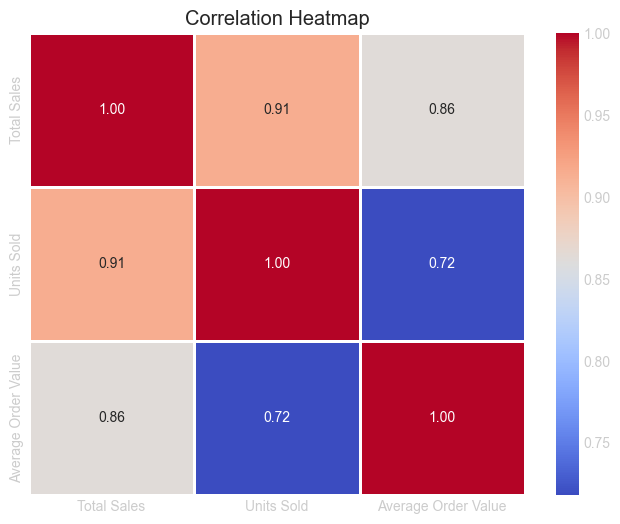

In [18]:
# Calculate Average Order Value (AOV) if not already available
nike_data['Average Order Value'] = nike_data['Total Sales'] / nike_data['Units Sold']

# Ensure 'Average Order Value' is calculated
nike_data['Average Order Value'] = nike_data['Total Sales'] / nike_data['Units Sold']

# Now, calculate the correlation matrix
correlation_matrix = nike_data[['Total Sales', 'Units Sold', 'Average Order Value']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()



Customer Lifetime Value (CLV)

In [22]:
# Check the columns of the dataset
print(nike_data.columns)


Index(['Invoice Date', 'Product', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Total Sales', 'Units Sold',
       'Average Order Value'],
      dtype='object')


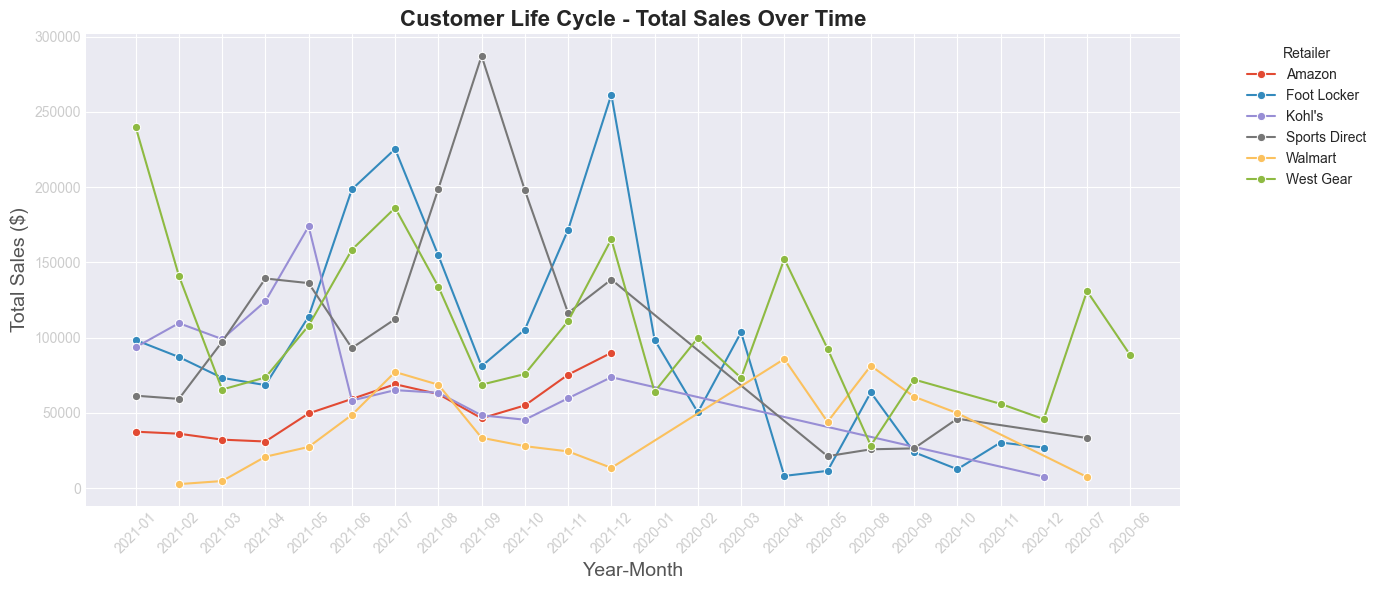

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Invoice Date' to datetime if it is not already
nike_data['Invoice Date'] = pd.to_datetime(nike_data['Invoice Date'])

# Extract Year-Month (if you want monthly customer life cycle analysis)
nike_data['Year-Month'] = nike_data['Invoice Date'].dt.to_period('M')

# Ensure 'Total Sales' is numeric, coercing errors to NaN (in case of invalid values)
nike_data['Total Sales'] = pd.to_numeric(nike_data['Total Sales'], errors='coerce')

# Drop rows with NaN in 'Total Sales' (if any invalid values were found)
nike_data.dropna(subset=['Total Sales'], inplace=True)

# Convert 'Year-Month' to string format for plotting purposes
nike_data['Year-Month'] = nike_data['Year-Month'].astype(str)

# Group by 'Retailer' and 'Year-Month' to calculate total sales per retailer over time
customer_lifecycle = nike_data.groupby(['Retailer', 'Year-Month']).agg({'Total Sales': 'sum'}).reset_index()

# Plot the Customer Life Cycle for Total Sales over time (for each retailer)
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_lifecycle, x='Year-Month', y='Total Sales', hue='Retailer', marker='o')
plt.title('Customer Life Cycle - Total Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for readability
plt.tight_layout()
plt.legend(title='Retailer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [27]:
import plotly.express as px

# Group by State to sum total sales
geo_data = nike_data.groupby('State')['Total Sales'].sum().reset_index()

# Plot choropleth map
fig = px.choropleth(geo_data, locations='State', color='Total Sales', 
                    hover_name='State', color_continuous_scale='Blues',
                    title='Total Sales by State')
fig.update_geos(showlakes=True, lakecolor='lightblue')
fig.show()


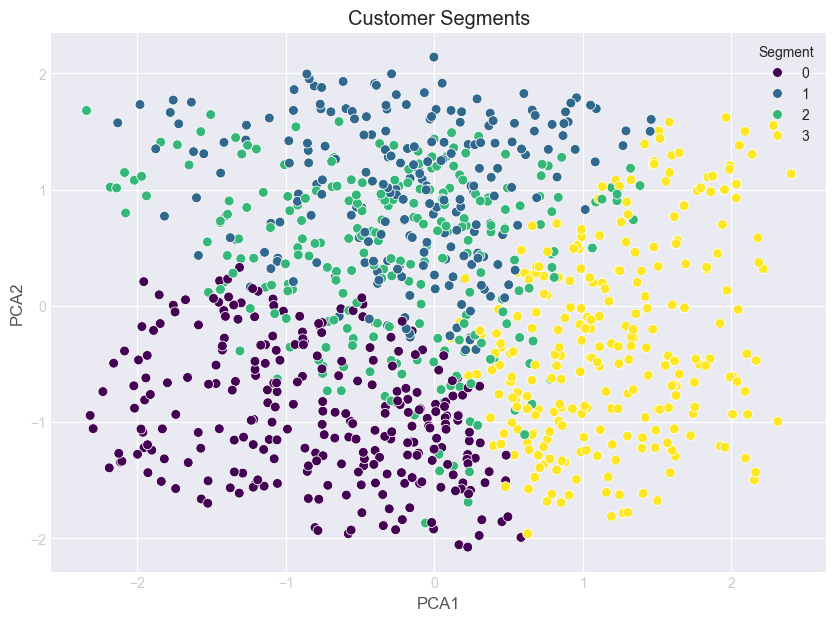

In [37]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
customers['PCA1'] = pca_result[:, 0]
customers['PCA2'] = pca_result[:, 1]

# Plotting segments
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=customers, palette='viridis', s=50)
plt.title('Customer Segments')
plt.show()


Purpose: Understand the relationships between key customer metrics. Principal Component Analysis (PCA) and Seaborn visualization to reduce the dimensionality of data and visualize customer segments

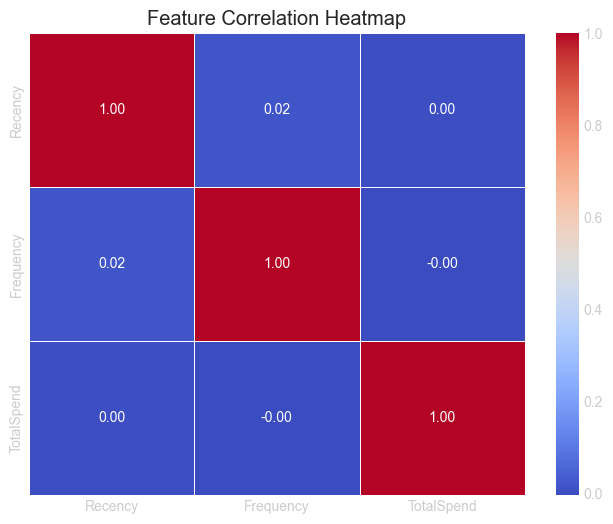

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = customers[['Recency', 'Frequency', 'TotalSpend']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Purpose: Understand the relationships between key customer metrics.

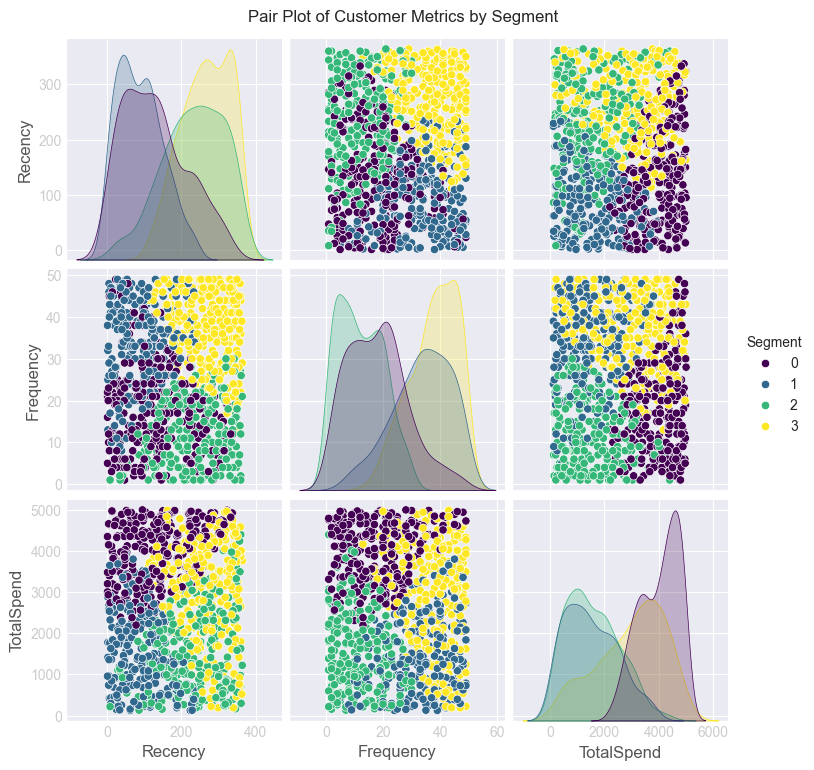

In [39]:
sns.pairplot(customers, vars=['Recency', 'Frequency', 'TotalSpend'], hue='Segment', palette='viridis')
plt.suptitle('Pair Plot of Customer Metrics by Segment', y=1.02)
plt.show()


Insight: Understand how segments differ in terms of feature interactions.

/Users/pratyushsingh/anaconda3/envs/DAB200/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



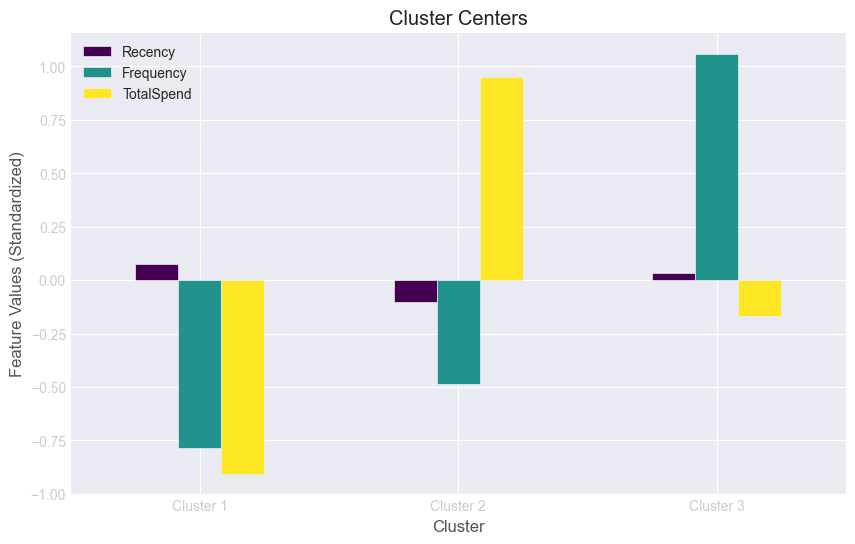

In [42]:
import pandas as pd
import numpy as np

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customers['Cluster'] = kmeans.fit_predict(X_scaled)

# Compute cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'TotalSpend'])

# Bar plot of cluster centers
cluster_centers.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Feature Values (Standardized)')
plt.xticks(ticks=np.arange(3), labels=['Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.show()


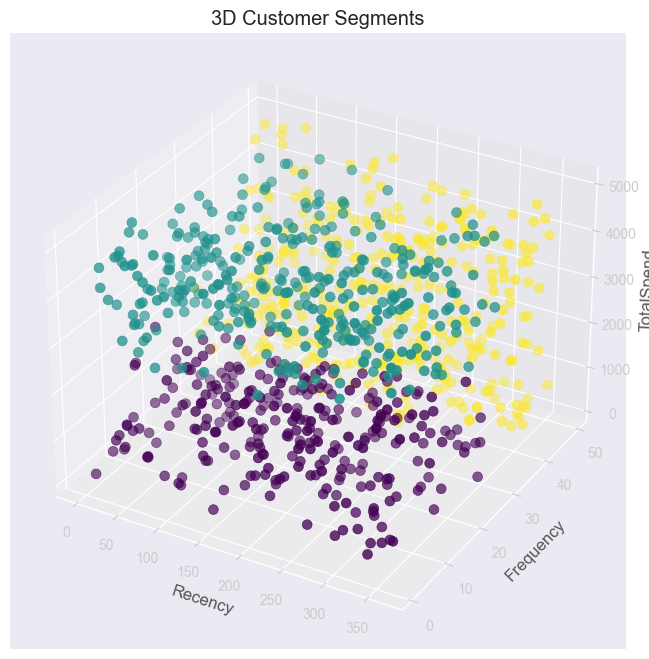

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(customers['Recency'], customers['Frequency'], customers['TotalSpend'], 
                      c=customers['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('TotalSpend')
plt.title('3D Customer Segments')
plt.show()
